# Labelbilder
Konzeptionell sind Labelbilder eine Erweiterung von Binärbildern. In einem Labelbild entsprechen alle Pixel mit dem Wert 0 dem Hintergrund, einem speziellen Bereich, der nicht als Objekt betrachtet wird. Pixel mit einem Wert größer als 0 zeigen an, dass der Pixel zu einem Objekt gehört und identifizieren dieses Objekt mit der gegebenen Nummer. Ein Pixel mit dem Wert `1` gehört zum ersten Objekt und Pixel mit dem Wert `2` gehören zu einem zweiten Objekt und so weiter. Idealerweise werden Objekte aufeinanderfolgend markiert, da dann die maximale Intensität in einem Labelbild der Anzahl der markierten Objekte in diesem Bild entspricht.

# Zusammenhangskomponenten-Labeling
Wir können technisch beide Alternativen für das Labeling von Zusammenhangskomponenten verwenden, abhängig von der Konnektivität, die in der [label-Funktion](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.label) verwendet wird.

Konnektivität
1. [von Neumann, 4-verbunden](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood)
2. [Moore, 8-verbunden](https://en.wikipedia.org/wiki/Moore_neighborhood)

## 4-verbundenes Komponenten-Labeling

Siehe auch
* [Zusammenhangskomponenten-Labeling](https://en.wikipedia.org/wiki/Connected-component_labeling)

Wir beginnen mit einem selbst erstellten Binärbild.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from pyclesperanto_prototype import imshow

binary_image = np.asarray([
    [1, 1, 0, 0, 0, 0 ,0],
    [0, 0, 1, 0, 0, 0 ,0],
    [0, 0, 0, 1, 1, 1 ,0],
    [0, 0, 0, 1, 1, 1 ,0],
    [1, 1, 0, 0, 0, 0 ,0],
    [1, 1, 0, 0, 1, 1 ,1],
    [1, 1, 0, 0, 1, 1 ,1],    
])

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_imshow.py:14: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


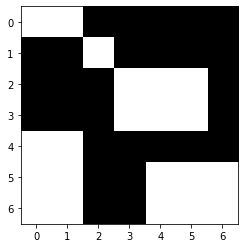

In [2]:
imshow(binary_image, color_map='Greys_r')

Dieses Binärbild kann auf zwei Arten interpretiert werden: Entweder gibt es fünf Rechtecke mit einer Größe zwischen 1 und 6 Pixeln. Alternativ gibt es zwei Rechtecke mit der Größe 6 und eine schlangenförmige Struktur mit der Größe von 9 Pixeln.



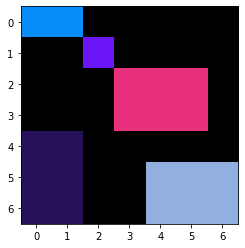

In [3]:
from skimage.measure import label
labeled_4_connected = label(binary_image, connectivity=1)

imshow(labeled_4_connected, labels=True)

## 8-verbundenes Komponenten-Labeling

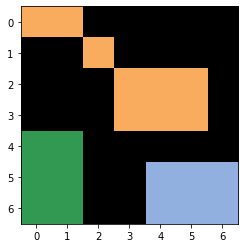

In [4]:
from skimage.measure import label
labeled_8_connected = label(binary_image, connectivity=2)

imshow(labeled_8_connected, labels=True)

In der Praxis ist für das Zählen von Zellen die Konnektivität nicht so wichtig. Deshalb wird der Konnektivitätsparameter oft nicht angegeben.

## Zusammenhangskomponenten-Labeling in clesperanto
In clesperanto sind beide Konnektivitätsoptionen für das Zusammenhangskomponenten-Labeling in zwei verschiedenen Funktionen implementiert. Beim Labeling von Objekten mit der 4-verbundenen Pixelnachbarschaft betrachten wir die "Diamant"-Nachbarschaft aller Pixel.

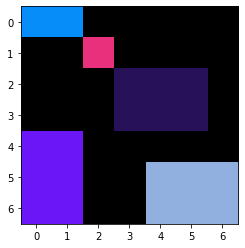

In [5]:
labeled_4_connected2 = cle.connected_components_labeling_diamond(binary_image)

imshow(labeled_4_connected2, labels=True)

Die 8-verbundene Nachbarschaft betrachtet eine "Box" um alle Pixel herum.

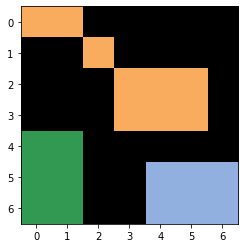

In [6]:
labeled_8_connected2 = cle.connected_components_labeling_box(binary_image)

imshow(labeled_8_connected2, labels=True)

## Labeling in der Praxis
Um das Labeling in einem praktischen Anwendungsfall zu demonstrieren, labeln wir das blobs.tif-Bild.

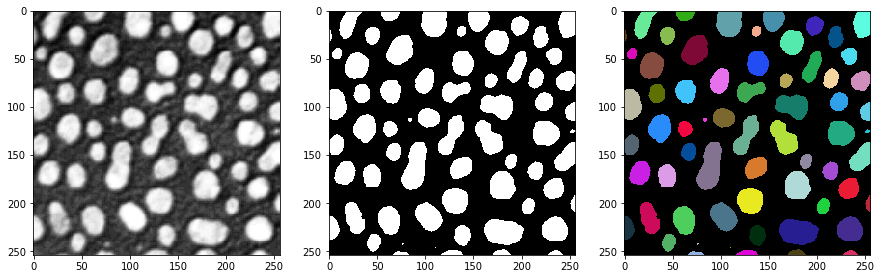

In [7]:
# Daten laden
from skimage.io import imread
blobs = imread("../../data/blobs.tif")

# Schwellenwertbildung
from skimage.filters import threshold_otsu
threshold = threshold_otsu(blobs)
binary_blobs = blobs > threshold

# Zusammenhangskomponenten-Labeling
from skimage.measure import label
labeled_blobs = label(binary_blobs)

# Visualisierung
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,15))

cle.imshow(blobs, plot=axs[0])
cle.imshow(binary_blobs, plot=axs[1])
cle.imshow(labeled_blobs, plot=axs[2], labels=True)

## Übung
Finden Sie experimentell heraus, was die Standardeinstellung des Konnektivitätsparameters der Funktion `skimage.measure.label` ist.